# Vulnerability Analysis: create reflect...Header

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import json
from datetime import datetime

In [2]:
sliceheader_df = pd.read_csv('/root/data/classification/interesting_snippets_sliceheader.csv')

## Snippets, die ich als "vuln:create_sliceheader" gelabelt habe

In [12]:
vuln_df = sliceheader_df[sliceheader_df['label']=='vuln:create_sliceheader']
vuln_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,text,context,line_number,column,absolute_offset,match_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name,file_copy_path,label
3,3,3,3,\tsliceHeader := &reflect.SliceHeader{\n,}\n\nfunc UnsafeCastString(str string) []byte ...,292.0,17.0,7104.0,reflect.SliceHeader,reflect2.go,7272.0,298.0,github.com/modern-go/reflect2,github.com/modern-go/reflect2,v1.0.1,kubernetes/kubernetes,github.com/modern-go/reflect2/reflect2.go,vuln:create_sliceheader
4,4,4,4,\th := (*reflect.SliceHeader)(unsafe.Pointer(&...,// Warning: the string returned by the functio...,21.0,8.0,616.0,reflect.SliceHeader,bytestostr.go,768.0,24.0,github.com/mailru/easyjson/jlexer,github.com/mailru/easyjson,v0.7.0,kubernetes/kubernetes,github.com/mailru/easyjson/jlexer/bytestostr.go,vuln:create_sliceheader
7,7,7,7,\t\tsh := &reflect.SliceHeader{\n,"\nfunc unmarshalBytes(data interface{}, buf []...",67.0,9.0,1400.0,reflect.SliceHeader,marshalers.go,4755.0,192.0,github.com/cilium/ebpf,github.com/cilium/ebpf,v0.0.0-20191113100448-d9fb101ca1fb,kubernetes/kubernetes,github.com/cilium/ebpf/marshalers.go,vuln:create_sliceheader
8,8,8,8,"\tbh := reflect.SliceHeader{Data: sh.Data, Len...",\n// StringToReadOnlyBytes returns bytes conve...,18.0,7.0,396.0,reflect.SliceHeader,util_unsafe.go,506.0,20.0,github.com/yuin/goldmark/util,github.com/yuin/goldmark,v1.1.28,gohugoio/hugo,github.com/yuin/goldmark/util/util_unsafe.go,vuln:create_sliceheader
11,11,11,11,\t\tData: ((*reflect.SliceHeader)(unsafe.Point...,\nfunc strslice(slice []byte) string {\n\tvar ...,68.0,11.0,1576.0,reflect.SliceHeader,murmur.go,1676.0,72.0,github.com/spaolacci/murmur3,github.com/spaolacci/murmur3,v1.1.0,syncthing/syncthing,github.com/spaolacci/murmur3/murmur.go,vuln:create_sliceheader
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,302,302,302,\t\t\thdr := &reflect.SliceHeader{\n,\tfor i := range retVal {\n\t\tretVal[i] = mak...,1143.0,11.0,29549.0,reflect.SliceHeader,iterator_native.go,29736.0,1152.0,gorgonia.org/tensor/native,gorgonia.org/tensor,v0.9.6,gorgonia/gorgonia,gorgonia.org/tensor/native/iterator_native.go,vuln:create_sliceheader
308,308,308,308,\tsliceHeader := &reflect.SliceHeader{\n,}\n\nfunc UnsafeCastString(str string) []byte ...,289.0,17.0,7069.0,reflect.SliceHeader,reflect2.go,7237.0,295.0,github.com/modern-go/reflect2,github.com/modern-go/reflect2,v0.0.0-20180320133207-05fbef0ca5da,googleforgames/agones,github.com/modern-go/reflect2/reflect2.go,vuln:create_sliceheader
313,313,313,313,\ttempSlice := *(*[]byte)(unsafe.Pointer(&refl...,"\t}\n}\n\nfunc newMemSwap(size uintptr, baseMe...",83.0,41.0,1999.0,reflect.SliceHeader,slice.go,4698.0,186.0,github.com/bradfitz/slice,github.com/bradfitz/slice,v0.0.0-20140430145140-a665b5dbaad5,bosun-monitor/bosun,github.com/bradfitz/slice/slice.go,vuln:create_sliceheader
314,314,314,314,\t\timem: *(*[]byte)(unsafe.Pointer(&reflect.S...,"\t\tLen: int(size),\n\t\tCap: int(size),\n\t...",89.0,35.0,2147.0,reflect.SliceHeader,slice.go,4698.0,186.0,github.com/bradfitz/slice,github.com/bradfitz/slice,v0.0.0-20140430145140-a665b5dbaad5,bosun-monitor/bosun,github.com/bradfitz/slice/slice.go,vuln:create_sliceheader


Welche Packages enthalten diese Snippets?

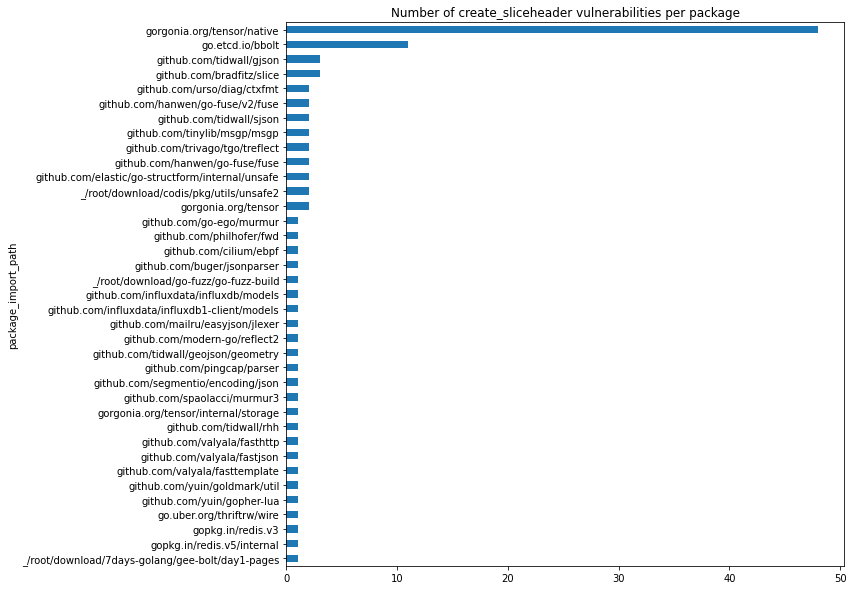

In [8]:
vuln_df\
    .groupby(['package_import_path', 'project_name'])['package_import_path'].count()\
    .groupby('package_import_path').max()\
    .sort_values(ascending=True)\
    .plot.barh(title='Number of create_sliceheader vulnerabilities per package', figsize=(10,10))

Wie viele Packages und Projekte sind das?

In [10]:
print("Anzahl Packages: {}".format(vuln_df['package_import_path'].nunique()))
print("Anzahl Projekte: {}".format(vuln_df['project_name'].nunique()))

Anzahl Packages: 37
Anzahl Projekte: 30
